**LUNG CANCER DETECTION USING TRANSFER LEARNING**

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D, Input, Lambda, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


INCEPTIONV3 USED AS PRETRAINED MODEL

In [2]:
Inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

87910968/87910968 [==============================] - 1s 0us/step


In [4]:
for layer in Inception.layers[:-15]:
    layer.trainable = False

x = Inception.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=4, activation='softmax')(x)
model = Model(Inception.input, output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [5]:
train_generator = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,
                                   zoom_range = 0.2,horizontal_flip = True)
test_generator = ImageDataGenerator(rescale = 1./255)

In [8]:
train_data = train_generator.flow_from_directory('/kaggle/input/chest-ctscan-images/Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,class_mode = 'categorical')

Found 613 images belonging to 4 classes.


In [9]:
test_data = train_generator.flow_from_directory('/kaggle/input/chest-ctscan-images/Data/test',
                                           target_size=(224, 224),
                                           batch_size=32,class_mode='categorical')

Found 315 images belonging to 4 classes.


In [10]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [13]:
history = model.fit(train_data,validation_data=test_data,epochs=15,batch_size=128,
              steps_per_epoch=len(train_data),validation_steps=len(test_data))

Epoch 1/15
20/20 [==============================] - 19s 988ms/step - loss: 0.8050 - accuracy: 0.6639 - val_loss: 0.7350 - val_accuracy: 0.6476
Epoch 2/15
20/20 [==============================] - 14s 714ms/step - loss: 0.6732 - accuracy: 0.7015 - val_loss: 0.7919 - val_accuracy: 0.6540
Epoch 3/15
20/20 [==============================] - 15s 751ms/step - loss: 0.5380 - accuracy: 0.7847 - val_loss: 0.9401 - val_accuracy: 0.6222
Epoch 4/15
20/20 [==============================] - 14s 700ms/step - loss: 0.3933 - accuracy: 0.8336 - val_loss: 0.8977 - val_accuracy: 0.6540
Epoch 5/15
20/20 [==============================] - 15s 741ms/step - loss: 0.4362 - accuracy: 0.8287 - val_loss: 0.9664 - val_accuracy: 0.6730
Epoch 6/15
20/20 [==============================] - 14s 713ms/step - loss: 0.3336 - accuracy: 0.8728 - val_loss: 1.1126 - val_accuracy: 0.6571
Epoch 7/15
20/20 [==============================] - 15s 743ms/step - loss: 0.3730 - accuracy: 0.8467 - val_loss: 0.5925 - val_accuracy: 0.7810

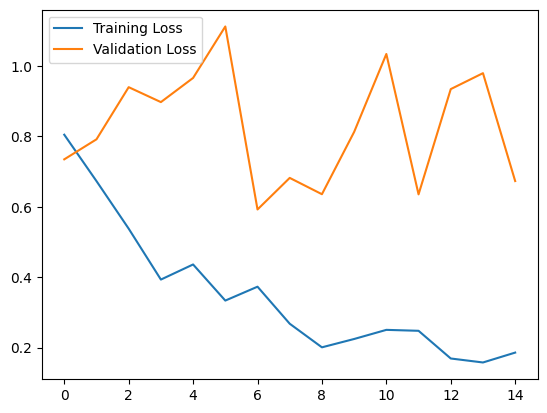

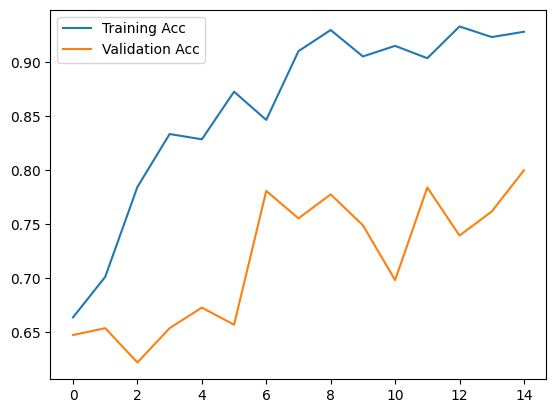

In [14]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.legend()
plt.show()

In [18]:
pred=model.predict(test_data,batch_size=32)
pred = np.argmax(pred,axis=1)

10/10 [==============================] - 5s 514ms/step


In [19]:
pred

array([2, 0, 0, 1, 3, 3, 1, 3, 3, 3, 0, 1, 3, 0, 0, 0, 0, 0, 3, 3, 1, 0,
       2, 0, 1, 0, 3, 0, 1, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 1, 1, 0, 2, 3,
       3, 3, 3, 0, 0, 1, 1, 3, 0, 2, 1, 0, 0, 0, 0, 3, 0, 0, 3, 1, 0, 0,
       2, 3, 1, 0, 3, 1, 3, 0, 3, 0, 0, 1, 3, 3, 0, 3, 0, 2, 1, 2, 0, 2,
       2, 3, 2, 0, 0, 2, 0, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 1, 3, 0, 0, 3,
       2, 0, 3, 0, 3, 0, 2, 3, 2, 2, 1, 1, 3, 0, 0, 0, 0, 0, 0, 2, 0, 3,
       3, 3, 0, 2, 2, 0, 2, 2, 0, 3, 0, 0, 3, 3, 0, 2, 3, 1, 0, 3, 0, 2,
       3, 3, 0, 3, 2, 1, 3, 1, 1, 2, 1, 3, 2, 3, 0, 3, 2, 0, 3, 0, 0, 2,
       2, 0, 3, 2, 0, 0, 0, 0, 3, 3, 3, 1, 2, 1, 0, 0, 3, 0, 0, 3, 0, 0,
       0, 3, 1, 3, 0, 2, 3, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 0, 1, 0, 3, 1,
       0, 3, 0, 0, 0, 3, 0, 0, 3, 1, 0, 3, 3, 0, 3, 3, 1, 2, 0, 2, 2, 0,
       1, 3, 3, 2, 2, 0, 2, 3, 0, 3, 2, 3, 0, 0, 1, 2, 2, 0, 1, 0, 0, 3,
       1, 0, 3, 0, 2, 1, 1, 0, 0, 0, 3, 1, 0, 0, 0, 1, 3, 3, 3, 0, 0, 0,
       1, 0, 1, 2, 3, 0, 2, 0, 0, 0, 1, 0, 3, 0, 3,

In [34]:
classes = ["Adenocarcinoma Chest Lung Cancer ","Large Cell Carcinoma Lung Cancer" ,
           "NO Lung Cancer/ NORMAL" , "Squamous Cell Carcinoma Lung Cancer"]

In [35]:
def predict(img):
    plt.figure(figsize=(40,8))
    print('-----------------------------------Chest Cancer Type Detection-------------------------------------')
    print()
    x=image.img_to_array(img)
    x=x/255
    plt.imshow(img)
    x=np.expand_dims(x,axis=0)
    print(classes[np.argmax(model.predict(x))])

-----------------------------------Chest Cancer Type Detection-------------------------------------

1/1 [==============================] - 0s 31ms/step
Large Cell Carcinoma Lung Cancer


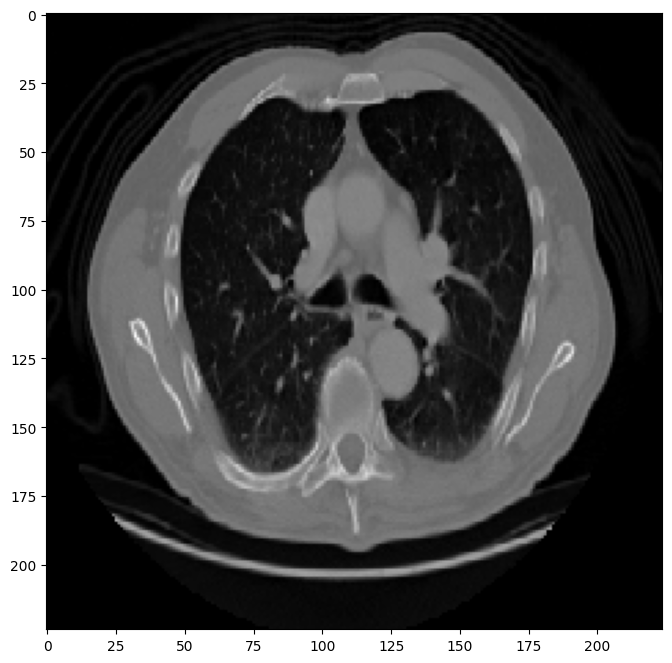

In [36]:
im=image.load_img('/kaggle/input/chest-ctscan-images/Data/test/large.cell.carcinoma/000174.png',target_size=(224,224))
predict(im)

-----------------------------------Chest Cancer Type Detection-------------------------------------

1/1 [==============================] - 0s 29ms/step
Squamous Cell Carcinoma Lung Cancer


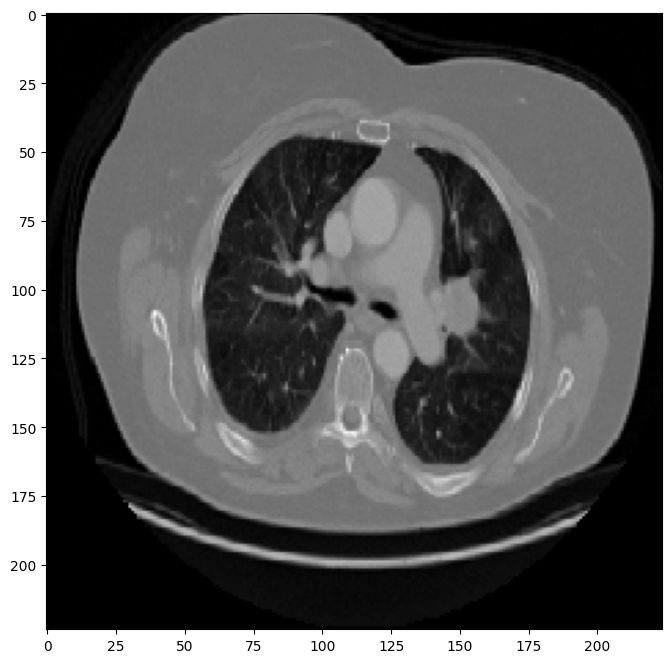

In [38]:
im=image.load_img('/kaggle/input/chest-ctscan-images/Data/test/squamous.cell.carcinoma/000154 (4).png',target_size=(224,224))
predict(im)

Successfully detected type of lung cancer for two images from the test data set